In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [216]:
train_data = pd.read_excel(r"Data_Train.xlsx")

pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [217]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [218]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [219]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [220]:
j =0
for i in train_data.columns:
    
    if train_data.columns[j]=='Date_of_Journey':
        pass
    else:
        print(train_data.columns[j])
        print(train_data[i].value_counts())
        print()
        print()
    j = j+1


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


Route
DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       6

In [221]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [222]:
train_data.columns

'Date_of_Journey'

In [223]:
train_data.dropna(inplace=True)

In [224]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [225]:
# as we wee 'Date_of_Journey' is objce type hence the same needs to be converted in to the date and time.
# we will use pd.to_datetime to convert the object to datetime
train_data['Date_of_Journey'].head(20)

0     24/03/2019
1      1/05/2019
2      9/06/2019
3     12/05/2019
4     01/03/2019
5     24/06/2019
6     12/03/2019
7     01/03/2019
8     12/03/2019
9     27/05/2019
10     1/06/2019
11    18/04/2019
12    24/06/2019
13     9/05/2019
14    24/04/2019
15     3/03/2019
16    15/04/2019
17    12/06/2019
18    12/06/2019
19    27/05/2019
Name: Date_of_Journey, dtype: object

In [226]:
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y")

In [227]:
train_data['JourneyDay'] = train_data['Date_of_Journey'].dt.day
train_data['JourneyMonth'] = train_data['Date_of_Journey'].dt.month
train_data['JourneyYear'] = train_data['Date_of_Journey'].dt.year
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [228]:
train_data['Dep_Time'] = pd.to_datetime(train_data['Dep_Time'])
train_data['Dep_Time'].unique()

array(['2023-04-06T22:20:00.000000000', '2023-04-06T05:50:00.000000000',
       '2023-04-06T09:25:00.000000000', '2023-04-06T18:05:00.000000000',
       '2023-04-06T16:50:00.000000000', '2023-04-06T09:00:00.000000000',
       '2023-04-06T18:55:00.000000000', '2023-04-06T08:00:00.000000000',
       '2023-04-06T08:55:00.000000000', '2023-04-06T11:25:00.000000000',
       '2023-04-06T09:45:00.000000000', '2023-04-06T20:20:00.000000000',
       '2023-04-06T11:40:00.000000000', '2023-04-06T21:10:00.000000000',
       '2023-04-06T17:15:00.000000000', '2023-04-06T16:40:00.000000000',
       '2023-04-06T08:45:00.000000000', '2023-04-06T14:00:00.000000000',
       '2023-04-06T20:15:00.000000000', '2023-04-06T16:00:00.000000000',
       '2023-04-06T14:10:00.000000000', '2023-04-06T22:00:00.000000000',
       '2023-04-06T04:00:00.000000000', '2023-04-06T21:25:00.000000000',
       '2023-04-06T21:50:00.000000000', '2023-04-06T07:00:00.000000000',
       '2023-04-06T07:05:00.000000000', '2023-04-06

In [229]:
train_data['Dep_Time_Hr'] = train_data['Dep_Time'].dt.hour
train_data['Dep_Time_Min'] = train_data['Dep_Time'].dt.minute
train_data.drop('Dep_Time',axis=1,inplace=True)

In [230]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,JourneyYear,Dep_Time_Hr,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [231]:
train_data['Arrival_Time'] = pd.to_datetime(train_data['Arrival_Time'])
train_data['Arrival_Time_Hour'] = train_data['Arrival_Time'].dt.hour
train_data['Arrival_Time_Minute'] = train_data['Arrival_Time'].dt.minute

In [232]:
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [233]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,JourneyYear,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [234]:
s = train_data['Duration']
s.str.contains('h') & s.str.contains('m')

0         True
1         True
2        False
3         True
4         True
         ...  
10678     True
10679     True
10680    False
10681     True
10682     True
Name: Duration, Length: 10682, dtype: bool

In [235]:
duration = list(train_data['Duration'])
duration
hours = list(train_data['Duration'])

for i in range(len(duration)):
    if "h" and "m" in duration[i]:
        a = duration[i].split(" ")[0]
        if "h" in a: 
            a = int(a.replace("h",""))*60
        elif "m" in a:
            a = int(a.replace("m",""))
    hours[i] = a


In [236]:
train_data['DurationHr'] = train_data['Duration'].str.split(" ",expand=True).get(0)
train_data['DurationMinute'] = train_data['Duration'].str.split(" ",expand=True).get(1)
train_data['DurationMinute'] = train_data['DurationMinute'].fillna("0m")
train_data['DurationMinute'].unique()

array(['50m', '25m', '0m', '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [237]:
DurationHr = list(train_data['DurationHr'])
DurationMinute = list(train_data['DurationMinute'])
DurationOnlyInMinutes = list()
DurationMinute

['50m',
 '25m',
 '0m',
 '25m',
 '45m',
 '25m',
 '30m',
 '5m',
 '30m',
 '50m',
 '15m',
 '35m',
 '15m',
 '10m',
 '35m',
 '35m',
 '30m',
 '35m',
 '0m',
 '35m',
 '10m',
 '20m',
 '50m',
 '55m',
 '20m',
 '10m',
 '45m',
 '55m',
 '50m',
 '15m',
 '15m',
 '25m',
 '50m',
 '0m',
 '30m',
 '25m',
 '15m',
 '30m',
 '15m',
 '55m',
 '5m',
 '30m',
 '5m',
 '45m',
 '0m',
 '50m',
 '50m',
 '15m',
 '5m',
 '55m',
 '15m',
 '20m',
 '50m',
 '0m',
 '50m',
 '15m',
 '5m',
 '15m',
 '30m',
 '5m',
 '25m',
 '20m',
 '15m',
 '30m',
 '15m',
 '25m',
 '50m',
 '30m',
 '20m',
 '15m',
 '25m',
 '30m',
 '20m',
 '30m',
 '0m',
 '45m',
 '50m',
 '30m',
 '5m',
 '15m',
 '50m',
 '40m',
 '10m',
 '35m',
 '0m',
 '20m',
 '25m',
 '45m',
 '20m',
 '0m',
 '15m',
 '5m',
 '30m',
 '20m',
 '35m',
 '25m',
 '40m',
 '0m',
 '25m',
 '35m',
 '20m',
 '15m',
 '30m',
 '0m',
 '45m',
 '55m',
 '10m',
 '30m',
 '20m',
 '55m',
 '0m',
 '55m',
 '45m',
 '10m',
 '55m',
 '25m',
 '5m',
 '10m',
 '40m',
 '55m',
 '40m',
 '25m',
 '5m',
 '15m',
 '25m',
 '10m',
 '10m',
 '0m'

In [238]:
for i in range(len(DurationHr)):
    if "h" in DurationHr[i]:
        DurationHr[i] = int(DurationHr[i].replace("h",""))*60
    elif "m" in DurationHr[i]:
        DurationHr[i] = int(DurationHr[i].replace("m",""))

        
for i in range(len(DurationMinute)):
    if "h" in DurationMinute[i]:
        DurationMinute[i] = int(DurationMinute[i].replace("h",""))*60
    elif "m" in DurationMinute[i]:
        DurationMinute[i] = int(DurationMinute[i].replace("m",""))

DurationHrMin = DurationMinute + DurationHr


for i in range(len(DurationHr)):
    DurationOnlyInMinutes.append(DurationHr[i]+DurationMinute[i])
    

DurationOnlyInMinutes = pd.DataFrame(DurationOnlyInMinutes,columns=['DurationOnlyInMinutes'])
DurationOnlyInMinutes


train_data = pd.concat([train_data , DurationOnlyInMinutes], axis=1)

train_data.drop(['Duration','DurationHr','DurationMinute'],axis=1,inplace=True)

DurationOnlyInMinutes.head()


,DurationOnlyInMinutes
0,170
1,445
2,1140
3,325
4,285


In [239]:
DurationOnlyInMinutes

,DurationOnlyInMinutes
0,170
1,445
2,1140
3,325
4,285
...,...
10677,150
10678,155
10679,180
10680,160


In [240]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,JourneyYear,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Minute,DurationOnlyInMinutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24.0,3.0,2019.0,22.0,20.0,1.0,10.0,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1.0,5.0,2019.0,5.0,50.0,13.0,15.0,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9.0,6.0,2019.0,9.0,25.0,4.0,25.0,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12.0,5.0,2019.0,18.0,5.0,23.0,30.0,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1.0,3.0,2019.0,16.0,50.0,21.0,35.0,285.0


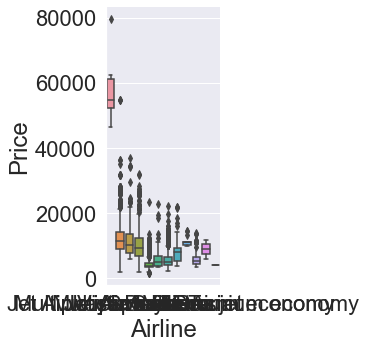

In [241]:
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind="box")
plt.show()

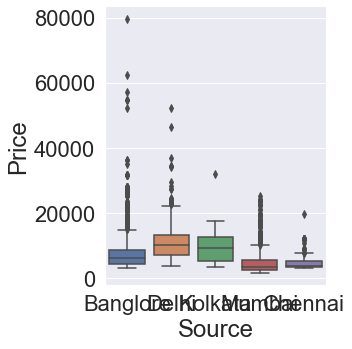

In [242]:
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind="box")
plt.show()

In [243]:
#Since airline is nominal categorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
Source = train_data[['Source']]
Destination = train_data[['Destination']]
Airline = pd.get_dummies(Airline,drop_first=True)
Source = pd.get_dummies(Source,drop_first=True)
Destination = pd.get_dummies(Destination,drop_first=True)
train_data['Total_Stops'] = train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})



In [244]:
data_train = pd.concat([train_data,Airline,Source,Destination],axis=1)

In [245]:
data_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,JourneyYear,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Minute,DurationOnlyInMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24.0,3.0,2019.0,22.0,20.0,1.0,10.0,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1.0,5.0,2019.0,5.0,50.0,13.0,15.0,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9.0,6.0,2019.0,9.0,25.0,4.0,25.0,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12.0,5.0,2019.0,18.0,5.0,23.0,30.0,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1.0,3.0,2019.0,16.0,50.0,21.0,35.0,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107.0,9.0,4.0,2019.0,19.0,55.0,22.0,25.0,155.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145.0,27.0,4.0,2019.0,20.0,45.0,23.0,20.0,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229.0,27.0,4.0,2019.0,8.0,20.0,11.0,20.0,160.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648.0,1.0,3.0,2019.0,11.0,30.0,14.0,10.0,500.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [246]:
data_train.drop(["Airline","Source","Destination","Route","Additional_Info"],axis=1,inplace=True)

In [247]:
data_train.head()

,Total_Stops,Price,JourneyDay,JourneyMonth,JourneyYear,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Minute,DurationOnlyInMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24.0,3.0,2019.0,22.0,20.0,1.0,10.0,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662.0,1.0,5.0,2019.0,5.0,50.0,13.0,15.0,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882.0,9.0,6.0,2019.0,9.0,25.0,4.0,25.0,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218.0,12.0,5.0,2019.0,18.0,5.0,23.0,30.0,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302.0,1.0,3.0,2019.0,16.0,50.0,21.0,35.0,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [248]:
data_train.dropna(axis=0,inplace=True)
data_train.columns

Index(['Total_Stops', 'Price', 'JourneyDay', 'JourneyMonth', 'JourneyYear',
       'Dep_Time_Hr', 'Dep_Time_Min', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'DurationOnlyInMinutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [249]:
X = data_train.loc[:,['Total_Stops','JourneyDay','JourneyMonth','JourneyYear','Dep_Time_Hr','Dep_Time_Min','Arrival_Time_Hour',
'Arrival_Time_Minute',
'DurationOnlyInMinutes',
'Airline_Air India',
'Airline_GoAir',
'Airline_IndiGo',
'Airline_Jet Airways',
'Airline_Jet Airways Business',
'Airline_Multiple carriers',
'Airline_Multiple carriers Premium economy',
'Airline_SpiceJet',
'Airline_Trujet',
'Airline_Vistara',
'Airline_Vistara Premium economy',
'Source_Chennai',
'Source_Delhi',
'Source_Kolkata',
'Source_Mumbai',
'Destination_Cochin',
'Destination_Delhi',
'Destination_Hyderabad',
'Destination_Kolkata',
'Destination_New Delhi']]

In [250]:
X.head()

,Total_Stops,JourneyDay,JourneyMonth,JourneyYear,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Minute,DurationOnlyInMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24.0,3.0,2019.0,22.0,20.0,1.0,10.0,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,1.0,5.0,2019.0,5.0,50.0,13.0,15.0,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,9.0,6.0,2019.0,9.0,25.0,4.0,25.0,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,12.0,5.0,2019.0,18.0,5.0,23.0,30.0,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,3.0,2019.0,16.0,50.0,21.0,35.0,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [251]:
y = data_train.iloc[:,1]
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

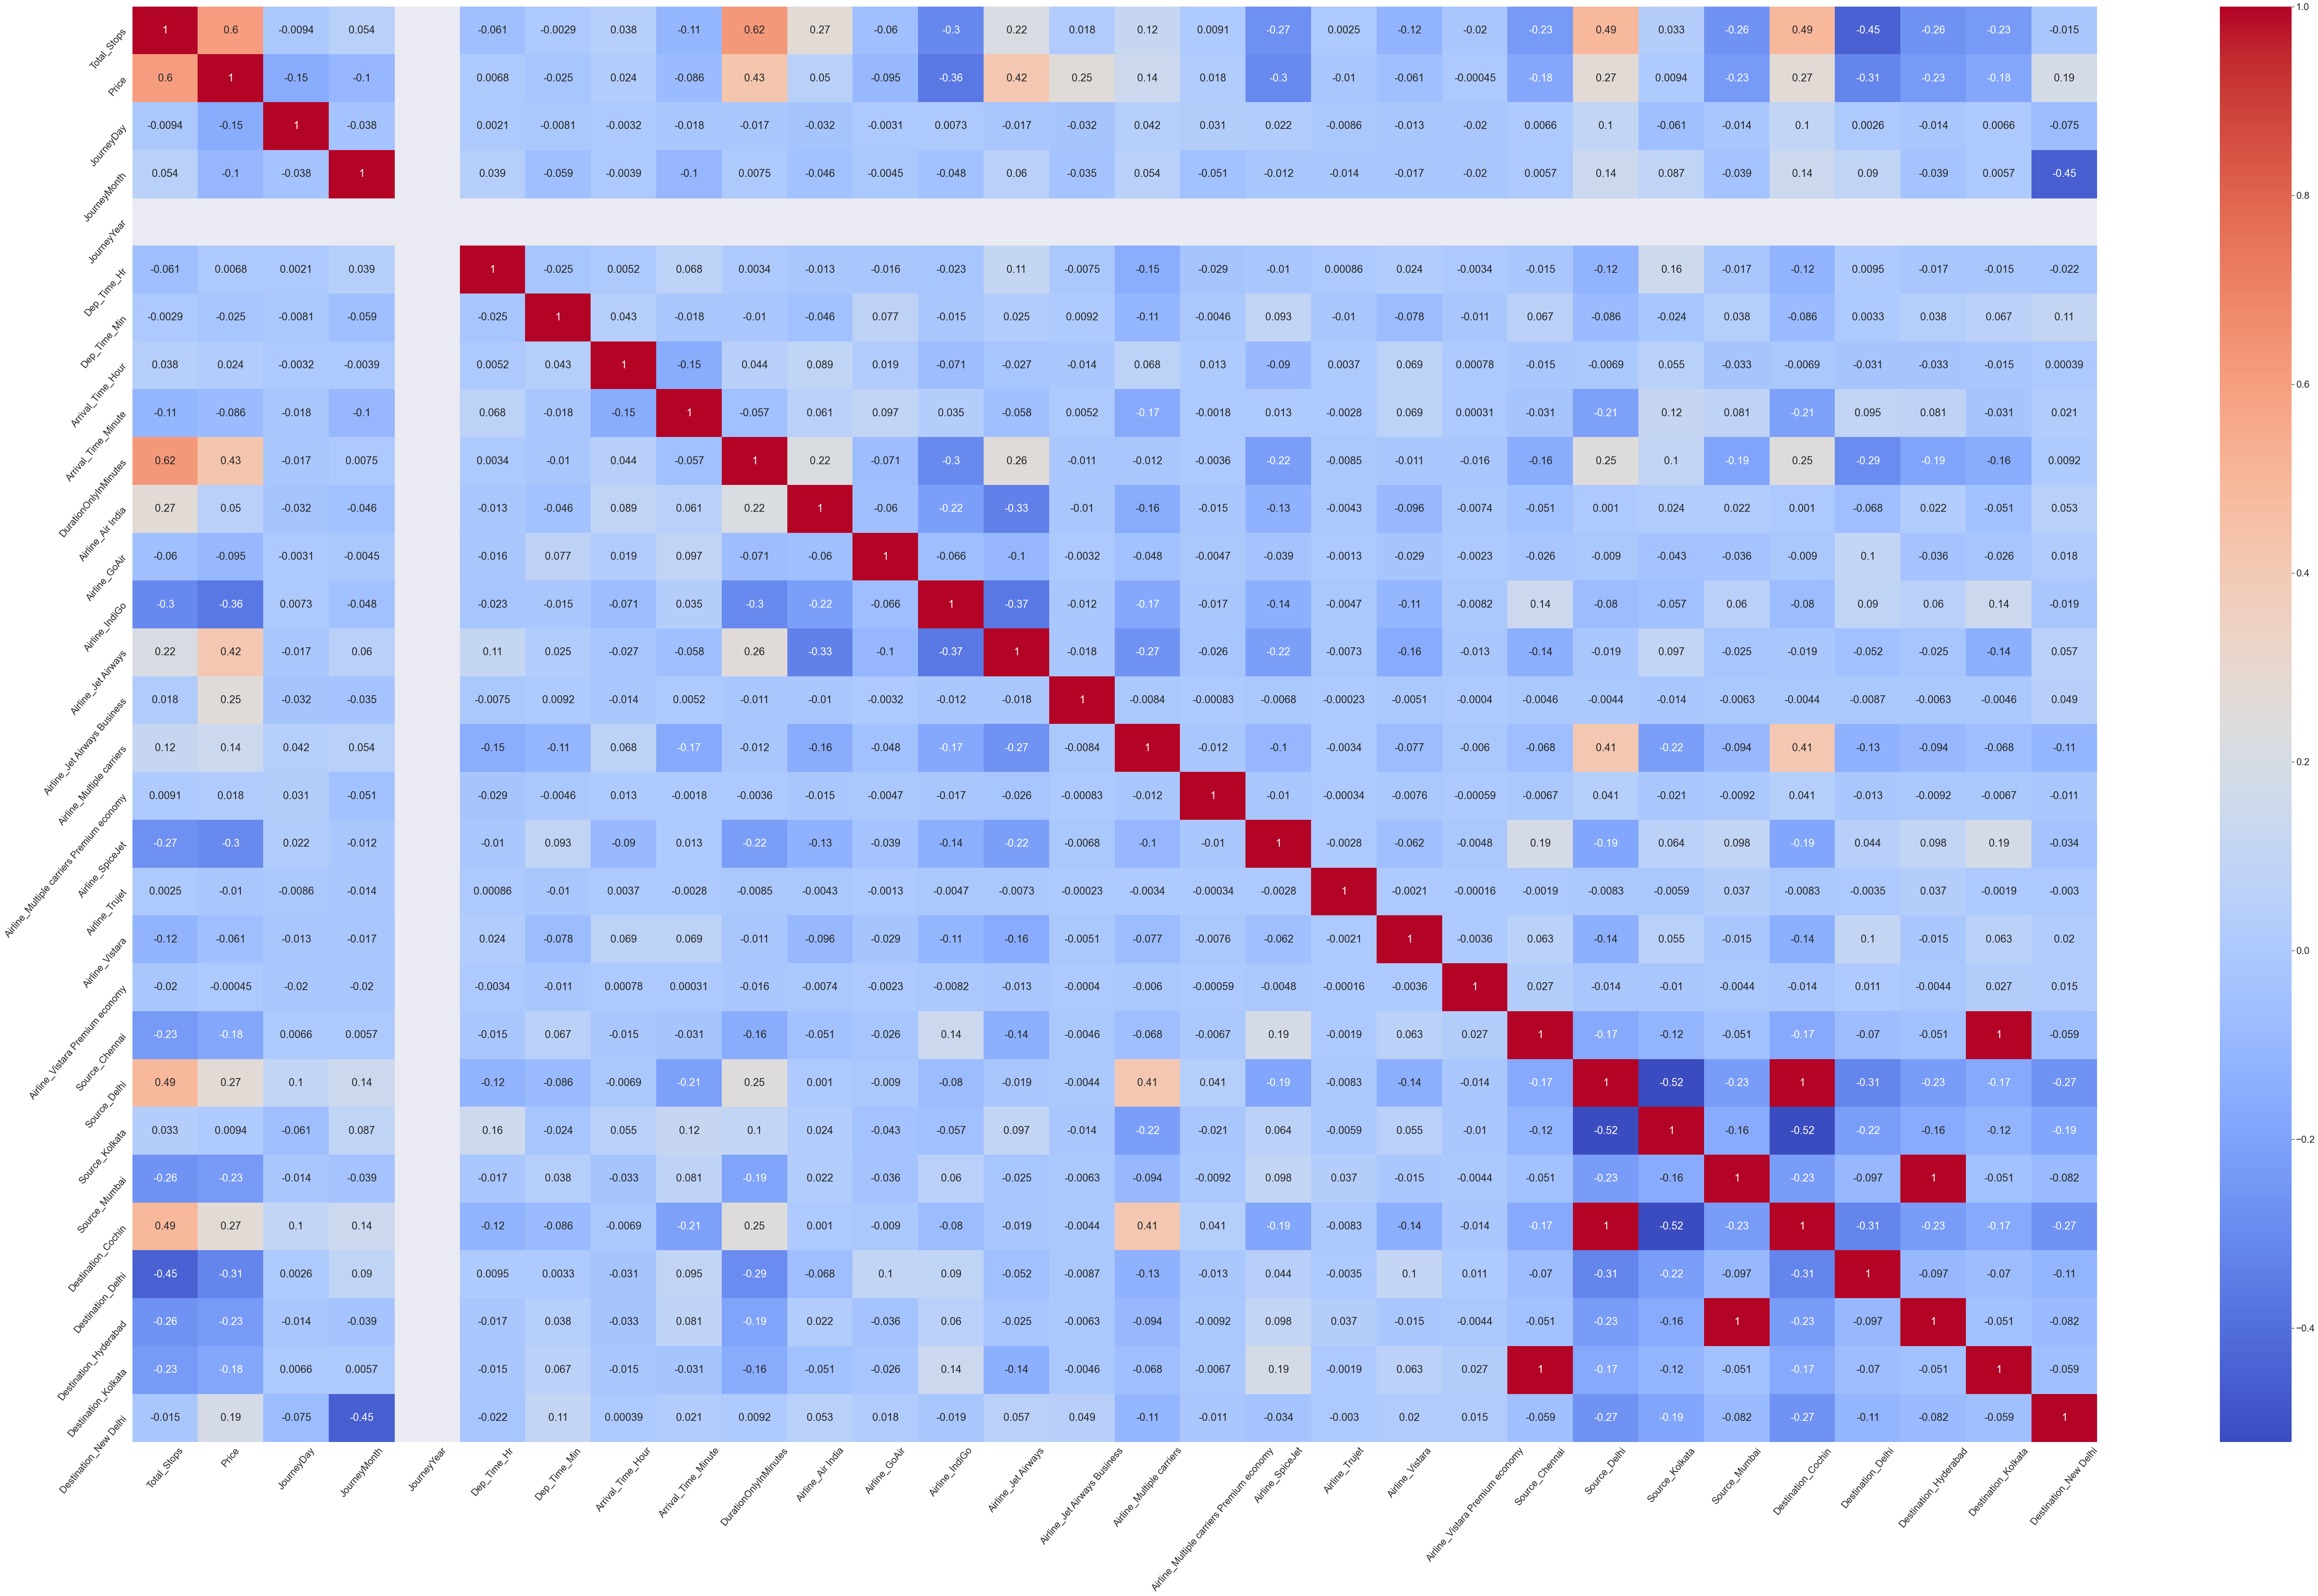

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(100,60)) 
sns.set(font_scale=2)
corr_matrix = data_train.corr()

yr = sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=ax)
yr.set_xticklabels(yr.get_xticklabels(),rotation=50)
yr.set_yticklabels(yr.get_yticklabels(),rotation=50)


plt.show()

In [253]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [254]:
print(selection.feature_importances_)

[2.39263652e-01 1.39985261e-01 5.39424083e-02 0.00000000e+00
 3.19506275e-02 2.70871389e-02 3.19147526e-02 2.33021899e-02
 7.69014532e-02 1.38786492e-02 1.84424581e-03 1.69379793e-02
 1.48859141e-01 6.66816495e-02 1.98824112e-02 9.16114563e-04
 3.23527941e-03 9.65746743e-05 6.15190175e-03 9.84914458e-05
 5.41949938e-04 1.26496923e-02 3.79479416e-03 7.56768321e-03
 1.44205259e-02 2.39673584e-02 8.71954528e-03 5.24054114e-04
 2.48844755e-02]


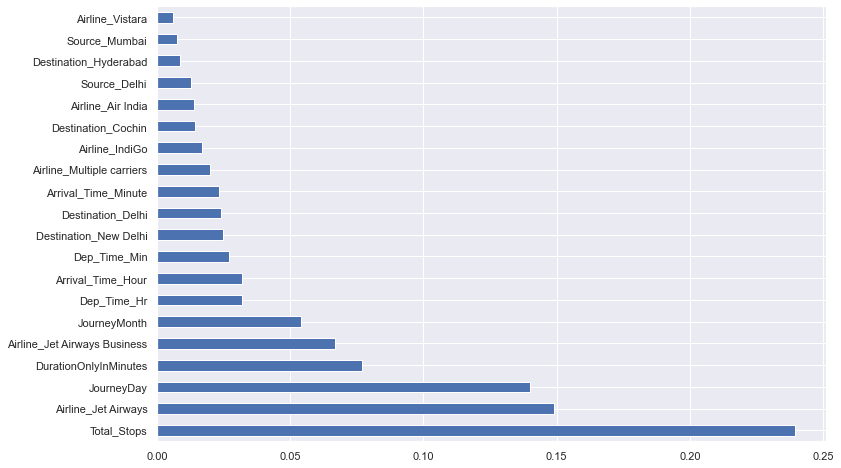

In [255]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [257]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)


RandomForestRegressor()

In [258]:
y_pred = reg_rf.predict(X_test)

y_pred

array([ 6271.46      ,  8578.27      , 10292.945     , ...,
        4743.6       ,  1980.95333333, 11186.66      ])

In [259]:
reg_rf.score(X_train,y_train)


0.9608869469582799

In [260]:
reg_rf.score(X_test,y_test)


0.823019031182002

In [261]:
y_test

4830      7476.0
3771      7927.0
1523      5963.0
3393     16289.0
4169      8016.0
          ...   
9870     13044.0
10062    18804.0
6911      4668.0
8616      2017.0
8988      9836.0
Name: Price, Length: 2137, dtype: float64

C:\Users\shind\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


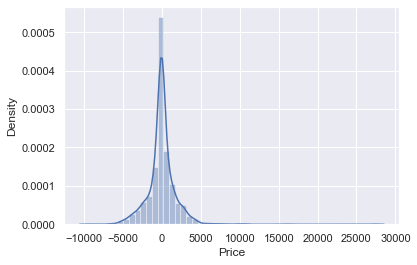

In [262]:
sns.distplot(y_test-y_pred)
plt.show()

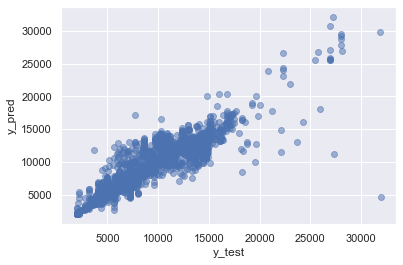

In [263]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [264]:

from sklearn import metrics


In [265]:

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1127.5137131327313
MSE: 3460962.4229821786
RMSE: 1860.3662066867853


In [266]:

metrics.r2_score(y_test,y_pred)


0.823019031182002

In [275]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
min_samples_leaf

[1, 2, 5, 10]

In [276]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [277]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [278]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [279]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [280]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [281]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [284]:
prediction = rf_random.predict(X_test)

C:\Users\shind\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


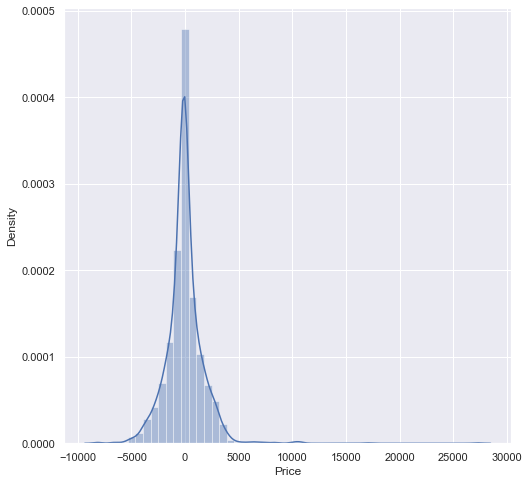

In [285]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

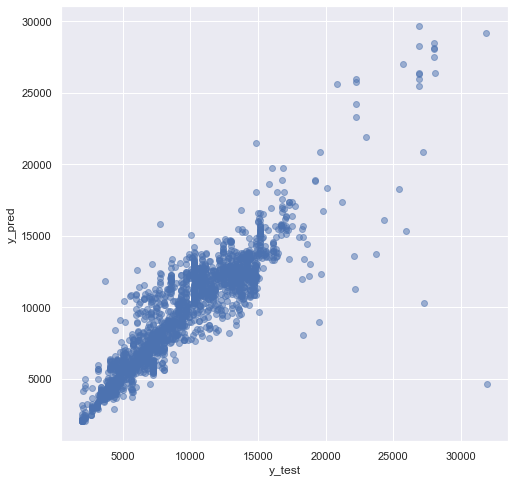

In [286]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [287]:

print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE: 1134.757113263135
MSE: 3259540.4332482433
RMSE: 1805.4197387998845


In [296]:
import pickle
file = open('flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [297]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [298]:
y_prediction = forest.predict(X_test)


In [299]:
y_prediction

array([ 7159.06369926,  8285.37479527,  9438.0080925 , ...,
        4739.04575134,  2069.2404739 , 10252.31322935])

In [300]:
metrics.r2_score(y_test,y_prediction)

0.8333190155584993